In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import re
from nltk.stem import PorterStemmer

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import spacy

from collections import Counter

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense,Input,Activation , concatenate , LSTM , Flatten ,Dropout
from keras.layers import Embedding
from tensorflow.keras.models import Model
from tensorflow import keras
from keras.callbacks import TensorBoard
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing 
from keras.models import Sequential


from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_aug3.csv"  ,index_col=[0])
df.head(5)

,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug
0,1.0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON,run,when father is dysfunctional and is so selfis...
1,2.0,0,@user @user thanks for #lyft credit i can't us...,thank credit not use caus not offer wheelchair...,PERSON,lyft disapointed getthanked,thanks for lyft credit can not use cause they...
2,3.0,0,bihday your majesty,bihday majesti,DATE,,bihday your majesty
3,4.0,0,#model i love u take with u all the time in ...,love take time ur,,model,model love take with all the time in ur
4,5.0,0,factsguide: society now #motivation,factsguid societi,,motivation,factsguide society now motivation


In [ ]:

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " I am", phrase)
    return phrase

stop_words =stopwords.words('english')

def stopword_removal(text):
  #removing stopwords from text
  word_tokens = word_tokenize(text)

  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

  return " ".join(filtered_sentence)

def preprocessing_text(i):   
    #lowercasing text
    i = i.lower()
    # "won\'t", "will not"  , "can\'t", "can not" , "n\'t", " not"....
    i = decontracted(i)
    #removing 1 letter word from sentence
    i = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',i)
    #removing some unique char
    i =  i.replace('_', ' ').replace("-"  , " ").replace("â"  , "a").replace("ï"  , "i")
    #removing stopwords
    i = stopword_removal(i)
    #removing Extra spaces 
    i = re.sub("\s\s+" , " ", i)
    return i

In [ ]:
clean_text = []

for i in tqdm(df["clean_text_fordataaug"]):
  clean_text.append(preprocessing_text(i))

df["clean_text_fordataaug2"]=clean_text

df =df[df["clean_text_fordataaug2"]!= '']

df.head(2)

100%|██████████| 36766/36766 [00:08<00:00, 4535.07it/s]


,id,label,tweet,clean_tweet,entity,hashtag,clean_text_fordataaug,clean_text_fordataaug2
0,1.0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON,run,when father is dysfunctional and is so selfis...,father dysfunctional selfish drags kids dysfun...
1,2.0,0,@user @user thanks for #lyft credit i can't us...,thank credit not use caus not offer wheelchair...,PERSON,lyft disapointed getthanked,thanks for lyft credit can not use cause they...,thanks lyft credit use cause offer wheelchair ...


In [ ]:
X = df["clean_text_fordataaug2"]
y = df["label"]


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y ,shuffle=True ,  random_state=42)

In [ ]:
token = Tokenizer()

In [ ]:
token.fit_on_texts(X_train)
token.word_index.items()

dict_items([('love', 1), ('day', 2), ('amp', 3), ('happy', 4), ('like', 5), ('time', 6), ('new', 7), ('life', 8), ('today', 9), ('people', 10), ('get', 11), ('thankful', 12), ('good', 13), ('positive', 14), ('one', 15), ('trump', 16), ('bihday', 17), ('see', 18), ('smile', 19), ('go', 20), ('want', 21), ('work', 22), ('take', 23), ('father', 24), ('make', 25), ('us', 26), ('weekend', 27), ('fun', 28), ('healthy', 29), ('got', 30), ('black', 31), ('summer', 32), ('need', 33), ('way', 34), ('ã', 35), ('great', 36), ('days', 37), ('family', 38), ('first', 39), ('friday', 40), ('friends', 41), ('world', 42), ('best', 43), ('white', 44), ('really', 45), ('bull', 46), ('beautiful', 47), ('back', 48), ('right', 49), ('going', 50), ('never', 51), ('music', 52), ('know', 53), ('would', 54), ('morning', 55), ('feel', 56), ('ur', 57), ('think', 58), ('wait', 59), ('sad', 60), ('girl', 61), ('week', 62), ('tomorrow', 63), ('orlando', 64), ('cute', 65), ('year', 66), ('fathersday', 67), ('blog', 68

In [ ]:
vocab_size = len(token.word_index) + 1
print(vocab_size)

36305


In [ ]:
X_train_encoded =token.texts_to_sequences(X_train)
X_test_encoded = token.texts_to_sequences(X_test)

In [ ]:
print(X_train_encoded[0])

[3632, 7444, 7445, 1, 731, 47, 65, 7446]


In [ ]:
len_list=[]
for i in range(0 , len(X_train_encoded)):
  len_list.append(len(X_train_encoded[i]))
max(len_list)  

48

In [ ]:
max_length =48
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_length, padding='post')

In [ ]:
X_train_padded

array([[ 3632,  7444,  7445, ...,     0,     0,     0],
       [ 4502,   392,    84, ...,     0,     0,     0],
       [  275,    14,    87, ...,     0,     0,     0],
       ...,
       [   70, 36304,    82, ...,     0,     0,     0],
       [   34,    73,   261, ...,     0,     0,     0],
       [    7,    15,   952, ...,     0,     0,     0]], dtype=int32)

In [ ]:
with open('/content/drive/MyDrive/Twitter NLP/glove_vectors', 'rb') as f:
  model = pickle.load(f)

embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tqdm(token.word_index.items()):
    embedding_vector = model.get(word)
    if embedding_vector is not None:
	      embedding_matrix[i]=embedding_vector

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
tf.keras.backend.clear_session()
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Flatten())
model.add(Dense(75, activation='relu'))
model.add(Dense(2, activation='relu'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 48, 100)           3630500   
                                                                 
 flatten_5 (Flatten)         (None, 4800)              0         
                                                                 
 dense_5 (Dense)             (None, 75)                360075    
                                                                 
 dense_6 (Dense)             (None, 2)                 152       
                                                                 
Total params: 3,990,727
Trainable params: 3,990,727
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# batch_size=32
# steps_per_epoch=int(len(X_train)/batch_size)

# fit the model
model.fit(X_train_padded, y_train, epochs=5 )

# evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test )
print('Accuracy: %f' % (accuracy*100))

Epoch 1/5
919/919 [==============================] - 39s 42ms/step - loss: 0.3073 - accuracy: 0.7063
Epoch 2/5
919/919 [==============================] - 38s 41ms/step - loss: 0.1250 - accuracy: 0.8661
Epoch 3/5
919/919 [==============================] - 42s 45ms/step - loss: 0.0760 - accuracy: 0.9265
Epoch 4/5
919/919 [==============================] - 39s 43ms/step - loss: 0.0520 - accuracy: 0.9472
Epoch 5/5
230/230 [==============================] - 1s 2ms/step - loss: 0.3934 - accuracy: 0.9191
Accuracy: 91.912866


              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95      5937
     class 1       0.81      0.75      0.78      1408

    accuracy                           0.92      7345
   macro avg       0.88      0.85      0.87      7345
weighted avg       0.92      0.92      0.92      7345



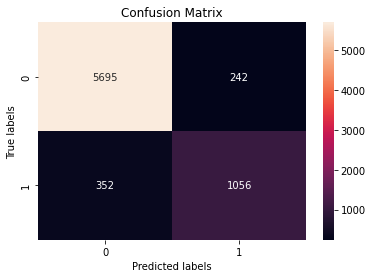

In [ ]:
y_prob = model.predict(X_test_padded) 
y_classes = y_prob.argmax(axis=-1)

cm = confusion_matrix(y_test,y_classes)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);


target_names = ['class 0', 'class 1']
print(classification_report(y_test,y_classes, target_names=target_names))

In [ ]:
tf.keras.backend.clear_session()
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Flatten())
model.add(Dense(75, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='relu'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])
# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 48, 100)           3630500   
                                                                 
 flatten (Flatten)           (None, 4800)              0         
                                                                 
 dense (Dense)               (None, 75)                360075    
                                                                 
 dense_1 (Dense)             (None, 10)                760       
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 3,991,357
Trainable params: 3,991,357
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train_padded, y_train, epochs=7 )

# evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test )
print('Accuracy: %f' % (accuracy*100))

Epoch 1/7
919/919 [==============================] - 38s 41ms/step - loss: 0.2933 - mse: 0.0778
Epoch 2/7
919/919 [==============================] - 37s 41ms/step - loss: 0.1043 - mse: 0.0843
Epoch 3/7
919/919 [==============================] - 37s 41ms/step - loss: 0.0675 - mse: 0.3230
Epoch 4/7
919/919 [==============================] - 38s 41ms/step - loss: 0.0485 - mse: 0.5407
Epoch 5/7
919/919 [==============================] - 38s 41ms/step - loss: 0.0423 - mse: 0.6831
Epoch 6/7
919/919 [==============================] - 37s 41ms/step - loss: 0.0436 - mse: 1.0843
Epoch 7/7
230/230 [==============================] - 1s 3ms/step - loss: 0.4803 - mse: 1.2001
Accuracy: 120.006824


              precision    recall  f1-score   support

     class 0       0.97      0.96      0.97      5937
     class 1       0.84      0.88      0.86      1408

    accuracy                           0.94      7345
   macro avg       0.90      0.92      0.91      7345
weighted avg       0.95      0.94      0.95      7345



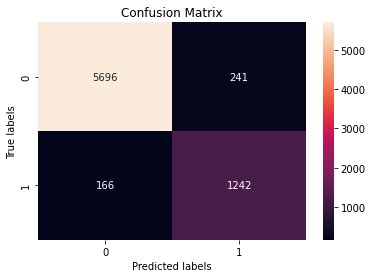

In [ ]:
y_prob = model.predict(X_test_padded) 
y_classes = y_prob.argmax(axis=-1)


cm = confusion_matrix(y_test,y_classes)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);


target_names = ['class 0', 'class 1']
print(classification_report(y_test,y_classes, target_names=target_names))